In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('Aemf1.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

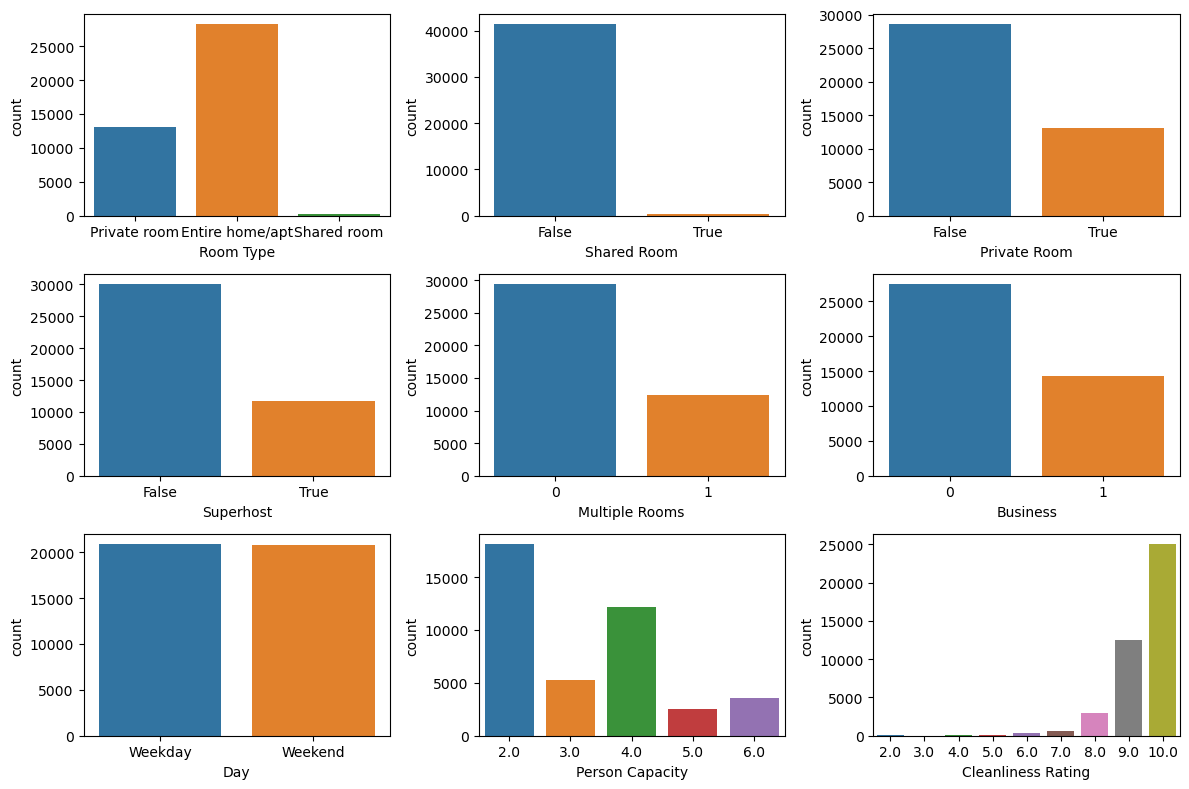

In [4]:
k = ['Room Type','Shared Room','Private Room','Superhost','Multiple Rooms','Business','Day','Person Capacity','Cleanliness Rating']
fig, ax = plt.subplots(3, 3,figsize=(12,8),dpi=100,sharey=False)
plt.xticks(rotation='horizontal')
sns.countplot(data=df,x=k[0], ax=ax[0][0])
sns.countplot(data=df,x=k[1], ax=ax[0][1])
sns.countplot(data=df,x=k[2], ax=ax[0][2])
sns.countplot(data=df,x=k[3], ax=ax[1][0])
sns.countplot(data=df,x=k[4], ax=ax[1][1])
sns.countplot(data=df,x=k[5], ax=ax[1][2])
sns.countplot(data=df,x=k[6], ax=ax[2][0])
sns.countplot(data=df,x=k[7], ax=ax[2][1])
sns.countplot(data=df,x=k[8], ax=ax[2][2])
plt.tight_layout()
plt.show()

In [5]:
df.rename(columns={'Day':'Weekend'},inplace=True)

In [6]:
df['Entire home/apt'] = np.where(df['Room Type']=='Entire home/apt',1,0)

In [6]:
df

,City,Price,Weekend,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [7]:
df['Superhost'] = df['Superhost'].map({True:1,False:0})
#df['Shared Room'] = df['Shared Room'].map({True:1,False:0})
#df['Private Room'] = df['Private Room'].map({True:1,False:0})
df['Weekend'] = df['Weekend'].map({'Weekend':1,'Weekday':0})

In [8]:
dfn = df.copy()
dfn.drop(['Shared Room','Private Room','Normalised Restraunt Index','Normalised Attraction Index'],axis=1,inplace=True)
dfn.head()

,City,Price,Weekend,Room Type,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index
0,Amsterdam,194.033698,0,Private room,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,Amsterdam,344.245776,0,Private room,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,Amsterdam,264.101422,0,Private room,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,Amsterdam,433.529398,0,Private room,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,Amsterdam,485.552926,0,Private room,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740


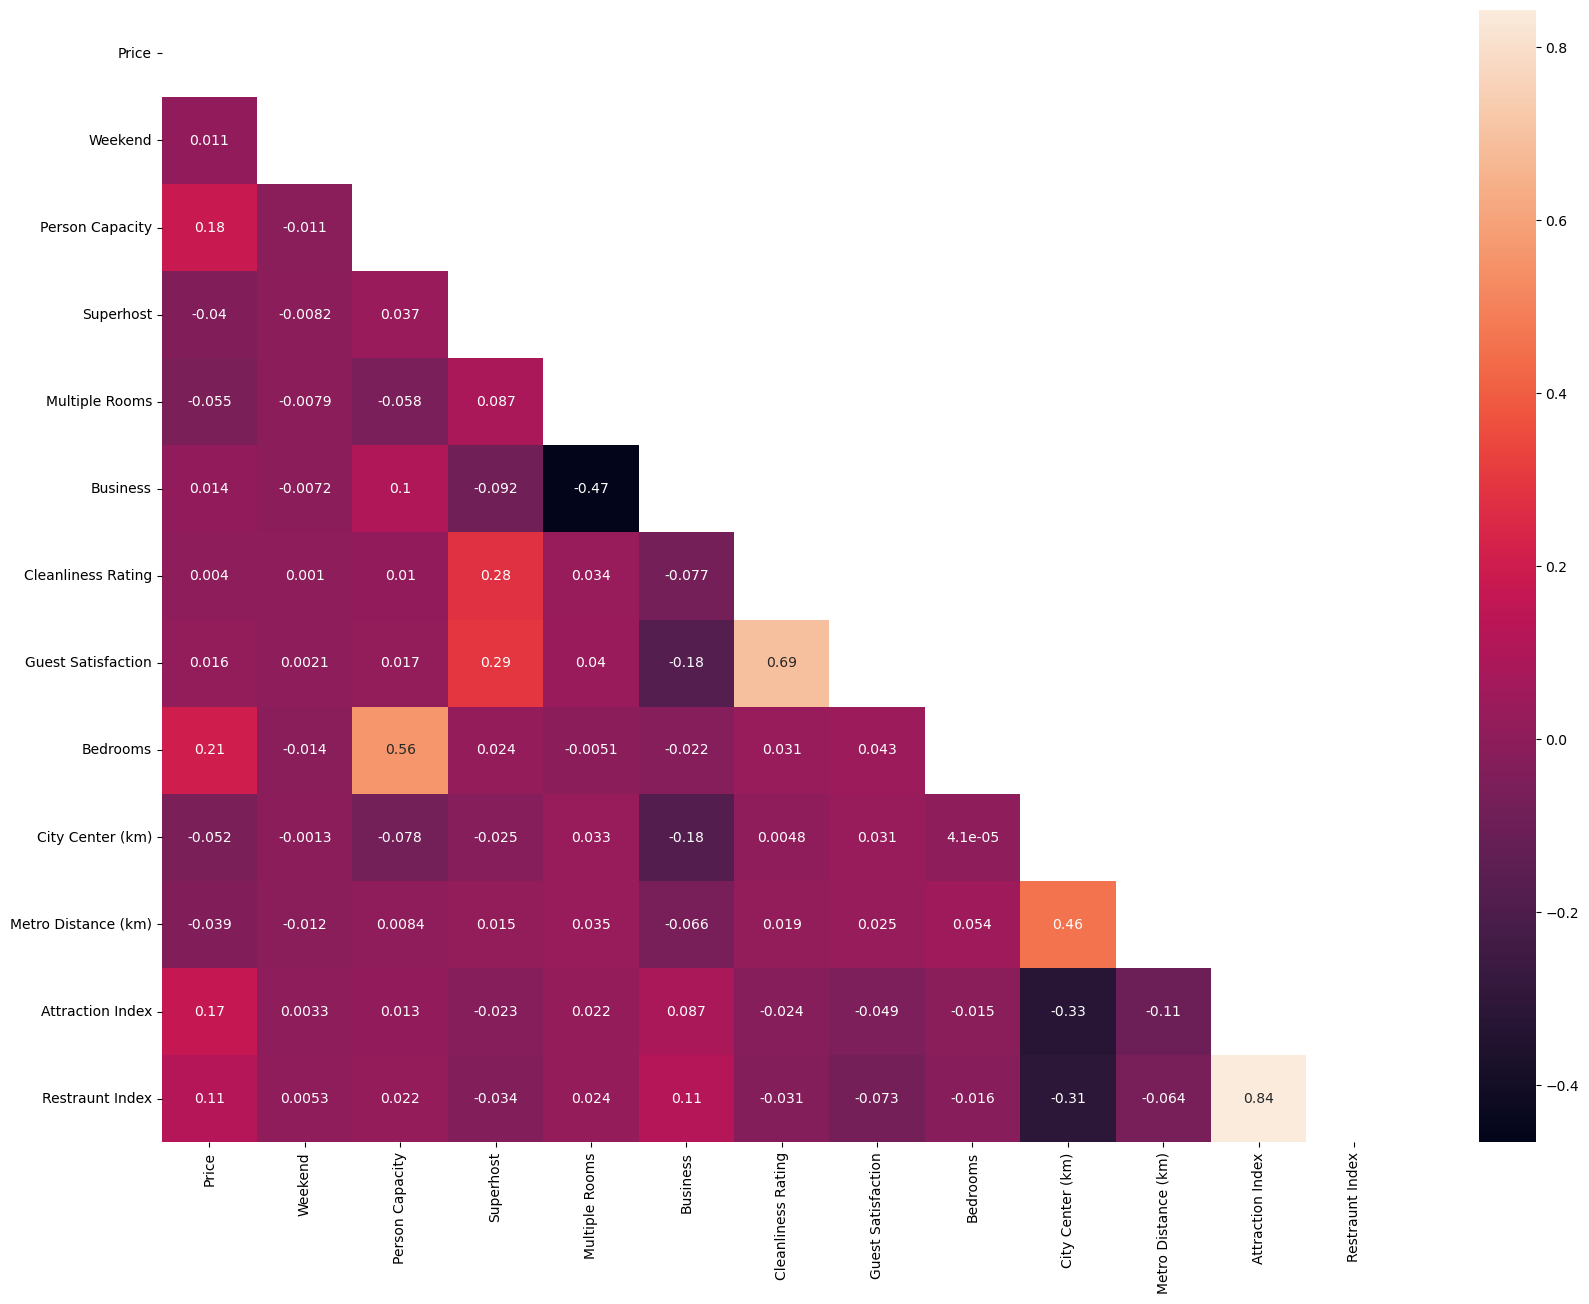

In [9]:
plt.figure(figsize=(20,15),dpi=100)
mask = np.triu(np.ones_like(dfn.corr()))
sns.heatmap(dfn.corr(),annot=True,mask=mask)
plt.show()

In [10]:
dfn.head()

,City,Price,Weekend,Room Type,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index
0,Amsterdam,194.033698,0,Private room,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,Amsterdam,344.245776,0,Private room,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,Amsterdam,264.101422,0,Private room,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,Amsterdam,433.529398,0,Private room,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,Amsterdam,485.552926,0,Private room,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740


In [11]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,41714.0,260.094423,279.408493,34.779339,144.016085,203.819274,297.373358,18545.450285
Weekend,41714.0,0.499305,0.500006,0.000000,0.000000,0.000000,1.000000,1.000000
Person Capacity,41714.0,3.237235,1.299459,2.000000,2.000000,3.000000,4.000000,6.000000
Superhost,41714.0,0.279498,0.448758,0.000000,0.000000,0.000000,1.000000,1.000000
Multiple Rooms,41714.0,0.295273,0.456171,0.000000,0.000000,0.000000,1.000000,1.000000
Business,41714.0,0.341180,0.474112,0.000000,0.000000,0.000000,1.000000,1.000000
Cleanliness Rating,41714.0,9.442274,0.889173,2.000000,9.000000,10.000000,10.000000,10.000000
Guest Satisfaction,41714.0,93.103179,8.141745,20.000000,90.000000,95.000000,98.000000,100.000000
Bedrooms,41714.0,1.165939,0.638157,0.000000,1.000000,1.000000,1.000000,10.000000
City Center (km),41714.0,2.679792,1.996684,0.015045,1.275913,2.253237,3.584489,25.284557


In [43]:
#Outliers in Price

q1 = np.percentile(dfn['Price'],1)
q3 = np.percentile(dfn['Price'],99)
print(q1)
print(q3)

69.59904389192229
1044.6886790242074


In [12]:
q1 = np.quantile(dfn['Price'],0.25)
q3 = np.quantile(dfn['Price'],0.75)
IQR = q3-1
low = q1-1.5*IQR
high = q3 + 1.5*IQR


In [13]:
dfn = dfn[(dfn['Price']>=low) & (dfn['Price'] <= high)]
dfn

,City,Price,Weekend,Room Type,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index
0,Amsterdam,194.033698,0,Private room,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,Amsterdam,344.245776,0,Private room,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,Amsterdam,264.101422,0,Private room,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,Amsterdam,433.529398,0,Private room,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,Amsterdam,485.552926,0,Private room,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,1,Entire home/apt,6.0,0,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,438.756874
41710,Vienna,304.793960,1,Entire home/apt,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,342.182813
41711,Vienna,637.168969,1,Entire home/apt,2.0,0,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,282.296424
41712,Vienna,301.054157,1,Private room,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,158.563398


In [14]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,40556.0,233.312092,127.588842,34.779339,141.678161,199.343340,286.350844,741.914438
Weekend,40556.0,0.499137,0.500005,0.000000,0.000000,0.000000,1.000000,1.000000
Person Capacity,40556.0,3.208107,1.286842,2.000000,2.000000,3.000000,4.000000,6.000000
Superhost,40556.0,0.281093,0.449538,0.000000,0.000000,0.000000,1.000000,1.000000
Multiple Rooms,40556.0,0.297169,0.457017,0.000000,0.000000,0.000000,1.000000,1.000000
Business,40556.0,0.342958,0.474703,0.000000,0.000000,0.000000,1.000000,1.000000
Cleanliness Rating,40556.0,9.440699,0.891810,2.000000,9.000000,10.000000,10.000000,10.000000
Guest Satisfaction,40556.0,93.064084,8.156922,20.000000,90.000000,95.000000,98.000000,100.000000
Bedrooms,40556.0,1.144442,0.617580,0.000000,1.000000,1.000000,1.000000,10.000000
City Center (km),40556.0,2.691859,2.004257,0.034661,1.284022,2.268292,3.599244,25.284557


In [15]:
average_price_city = dfn.groupby(by='City')['Price'].mean()
average_price_city

City
Amsterdam    421.526861
Athens       147.414083
Barcelona    254.289301
Berlin       225.482746
Budapest     170.967175
Lisbon       236.136412
Paris        337.745585
Rome         200.673689
Vienna       228.726334
Name: Price, dtype: float64

In [16]:
le = LabelEncoder()
dfn['City_cat'] = le.fit_transform(dfn['City'])
dfn['Room_cat'] = le.fit_transform(dfn['Room Type'])

dfn.drop(['City','Room Type'],axis=1,inplace=True)

In [43]:
dfn=pd.get_dummies(dfn)

In [17]:
dfn

,Price,Weekend,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,City_cat,Room_cat
0,194.033698,0,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,0,1
1,344.245776,0,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,0,1
2,264.101422,0,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,0,1
3,433.529398,0,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,0,1
4,485.552926,0,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,715.938574,1,6.0,0,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,438.756874,8,0
41710,304.793960,1,2.0,0,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,342.182813,8,0
41711,637.168969,1,2.0,0,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,282.296424,8,0
41712,301.054157,1,2.0,0,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,158.563398,8,1


In [18]:
features = dfn.drop('Price',axis=1)
target = dfn['Price']
x_train , x_test , y_train , y_test = train_test_split(features,target,test_size=0.23,random_state=123)

In [19]:
scaller = MinMaxScaler(feature_range=(0,1))
xtr_scalled = pd.DataFrame(data=scaller.fit_transform(x_train),columns=x_train.columns)
xts_scalled = pd.DataFrame(data=scaller.transform(x_test),columns=x_test.columns)

In [20]:
xtr_scalled

,Weekend,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,City_cat,Room_cat
0,0.0,0.0,1.0,1.0,0.0,1.000,0.9875,0.1,0.034294,0.031997,0.024476,0.038359,0.125,0.5
1,0.0,0.0,1.0,1.0,0.0,1.000,0.9625,0.1,0.089054,0.046089,0.011737,0.017009,0.125,0.5
2,0.0,0.0,1.0,1.0,0.0,1.000,0.9625,0.1,0.160080,0.061002,0.013155,0.020498,0.375,0.5
3,1.0,0.0,0.0,0.0,0.0,1.000,1.0000,0.1,0.333119,0.037147,0.006143,0.006476,1.000,0.0
4,1.0,1.0,1.0,1.0,0.0,0.875,0.9375,0.1,0.048596,0.025772,0.037510,0.073377,0.125,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31223,0.0,0.0,0.0,1.0,0.0,0.875,0.8125,0.1,0.047719,0.037956,0.107641,0.179516,0.250,0.5
31224,1.0,0.0,0.0,1.0,0.0,1.000,0.8750,0.1,0.108101,0.074221,0.017367,0.035555,0.500,0.0
31225,0.0,0.0,0.0,0.0,1.0,1.000,1.0000,0.1,0.039084,0.053802,0.040040,0.130761,0.625,0.0
31226,1.0,0.0,1.0,0.0,0.0,1.000,0.9500,0.1,0.148748,0.002243,0.044477,0.107726,0.750,0.5


In [21]:
xts_scalled

,Weekend,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Restraunt Index,City_cat,Room_cat
0,1.0,0.75,0.0,1.0,0.0,1.000,0.9500,0.2,0.037659,0.012639,0.146367,0.318715,0.875,0.0
1,1.0,0.50,0.0,0.0,1.0,0.875,0.9125,0.1,0.128592,0.174152,0.019815,0.046005,0.625,0.0
2,0.0,0.25,1.0,0.0,0.0,1.000,0.9625,0.1,0.066737,0.038255,0.036119,0.060394,0.500,0.0
3,1.0,0.50,1.0,0.0,1.0,1.000,0.9625,0.1,0.065037,0.016608,0.040114,0.061975,0.500,0.0
4,0.0,0.00,0.0,0.0,1.0,0.750,0.5000,0.0,0.031925,0.014048,0.101158,0.241740,0.750,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,1.0,0.00,1.0,1.0,0.0,1.000,0.9500,0.1,0.096659,0.019152,0.074770,0.123521,0.250,0.5
9324,0.0,0.00,0.0,0.0,1.0,1.000,0.7500,0.1,0.082997,0.018272,0.022786,0.076733,0.625,0.5
9325,1.0,0.25,0.0,1.0,0.0,0.875,0.8875,0.1,0.060621,0.020820,0.076504,0.182686,0.250,0.5
9326,0.0,0.25,0.0,0.0,0.0,1.000,1.0000,0.1,0.148133,0.020354,0.079359,0.180115,0.750,0.0


In [22]:
ln = LinearRegression()
ln.fit(xtr_scalled,y_train)
prediction = ln.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m1 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['LinearRegression'])
m1

,score,mse,mae,rmse
LinearRegression,0.204085,12939.484125,84.344928,113.751853


In [23]:
tr = DecisionTreeRegressor()
tr.fit(xtr_scalled,y_train)
prediction = tr.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m2 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['DecisionTree'])
m2

,score,mse,mae,rmse
DecisionTree,0.661565,5502.058718,39.282213,74.175863


In [24]:
fr = RandomForestRegressor()
fr.fit(xtr_scalled,y_train)
predictionf = fr.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m3 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['RandomForest'])
m3

,score,mse,mae,rmse
RandomForest,0.661565,5502.058718,39.282213,74.175863


In [25]:
gr = GradientBoostingRegressor()
gr.fit(xtr_scalled,y_train)
prediction = gr.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m4 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['GradientBoosting'])
m4

,score,mse,mae,rmse
GradientBoosting,0.631936,5983.746067,54.311427,77.354677


In [26]:
xgb = XGBRegressor()
xgb.fit(xtr_scalled,y_train)
prediction = xgb.predict(xts_scalled)
score = r2_score(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
rmse = np.sqrt(mse)
m5 = pd.DataFrame({'score':score,'mse':mse , 'mae':mae,'rmse':rmse}, index=['XGB'])
m5

,score,mse,mae,rmse
XGB,0.720017,4551.792006,46.870505,67.46697


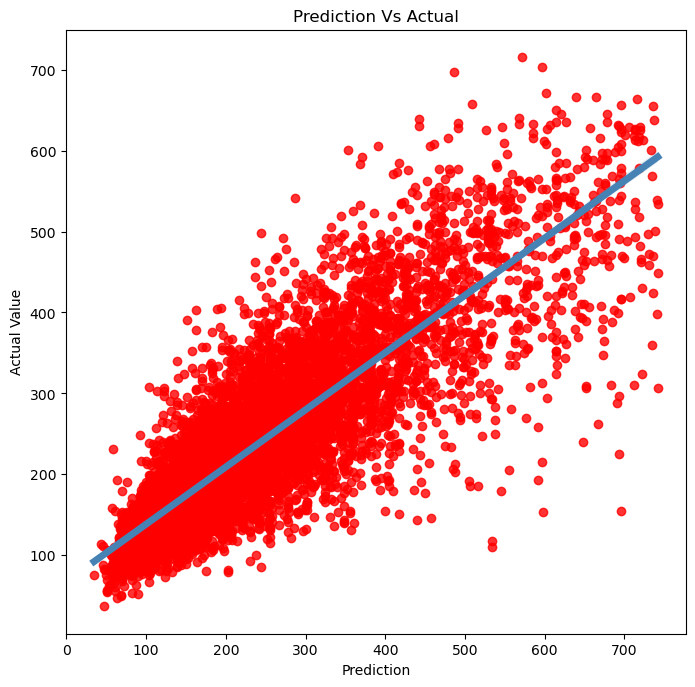

In [27]:
plt.figure(figsize=(8,8),dpi=100)
plt.title('Prediction Vs Actual')
sns.regplot(x=y_test,y=prediction,color='red',line_kws={'lw': 5, 'color': '#4682b4'})
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.show()